In [1]:
import os
import glob
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = "/home/umut/Desktop/thermal-disaster-dataset/others/selected_images_and_labels_hist_eq"

SAVE_PATH = "/home/umut/Desktop/thermal-disaster-dataset/HIT_UAV_and_NII_CU_clean_final_cropped_annotations"
os.makedirs(SAVE_PATH, exist_ok=True)

img_paths = glob.glob(os.path.join(DATASET_PATH, "images", "*"))

label_paths = glob.glob(os.path.join(DATASET_PATH, "labels", "*"))
print(f"there are {len(img_paths)} images and {len(label_paths)} labels")
sum_of_annotations_hist = np.zeros(256)
sum_of_image_hist = np.zeros(256)
annotation_count = 0
image_count = 0

for (img_path, label_path) in zip(sorted(img_paths, key=lambda x : os.path.basename(x)), sorted(label_paths, key=lambda x : os.path.basename(x))):
    img_name = os.path.splitext(img_path.split("/")[-1])[0]
    label_name = os.path.splitext(label_path.split("/")[-1])[0]


    if(img_name != label_name):
        print("IMAGE NAME DOES NOT MATCH WITH LABEL NAME")
        exit()

    img = ImageOps.grayscale(Image.open(img_path))
    image_width, image_height = img.size

    with open(label_path, "r") as f:
        lines = f.readlines()
    
    for (i, line) in enumerate(lines):
        c, x, y, w, h = (float(x) for x in line.split(" "))

        x1 = int((x - w/2) * image_width)
        y1 = int((y - h/2) * image_height)
        x2 = int((x + w/2) * image_width)
        y2 = int((y + h/2) * image_height)

        im_cropped = img.crop((x1, y1, x2, y2))
        im_cropped.save(os.path.join(SAVE_PATH, img_name + f"_{i}.png"))
        current_hist = np.array(im_cropped.histogram())
        sum_of_annotations_hist += current_hist
        annotation_count += 1
    sum_of_image_hist += np.array(img.histogram())
    image_count += 1


#get moving average with 5 neighbors for each point in array
def moving_average(a, n=5):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n

there are 654 images and 654 labels


image count: 654, annotation count: 3501
median of annotations: 244, median of images: 123
std of annotations: 0.00268661828632526, std of images: 0.0034783855210072734


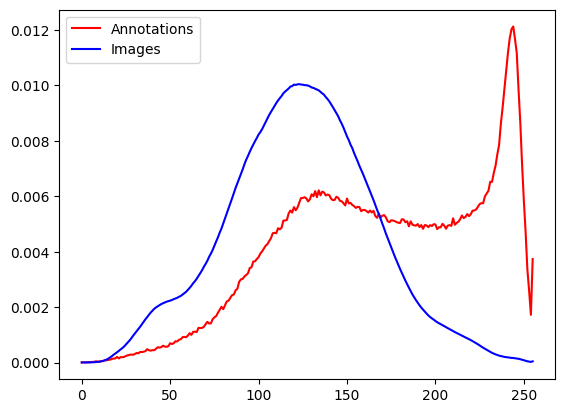

In [2]:
sum_of_annotations_hist_clustered = moving_average(sum_of_annotations_hist, n=1)
sum_of_image_hist_clustered = moving_average(sum_of_image_hist, n=1)



norm_sum_of_annotations_hist = sum_of_annotations_hist_clustered / np.sum(sum_of_annotations_hist_clustered)
norm_sum_of_image_hist = sum_of_image_hist_clustered / np.sum(sum_of_image_hist_clustered)

print(f"image count: {image_count}, annotation count: {annotation_count}")
print(f"median of annotations: {np.argmax(sum_of_annotations_hist)}, median of images: {np.argmax(sum_of_image_hist)}")
print(f"std of annotations: {np.std(norm_sum_of_annotations_hist)}, std of images: {np.std(norm_sum_of_image_hist)}")


    
plt.plot(norm_sum_of_annotations_hist, color="red")
plt.plot(norm_sum_of_image_hist, color="blue")
plt.legend(["Annotations", "Images"])
plt.show()

image count: 654, annotation count: 3501
median of annotations: 244, median of images: 123
std of annotations: 0.002676264628266959, std of images: 0.0034684754903119546


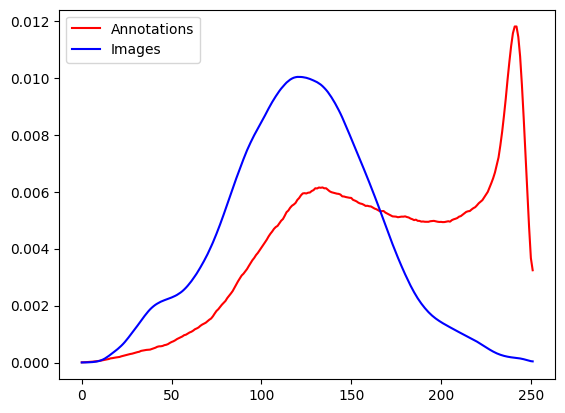

In [3]:
sum_of_annotations_hist_clustered = moving_average(sum_of_annotations_hist, n=5)
sum_of_image_hist_clustered = moving_average(sum_of_image_hist, n=5)



norm_sum_of_annotations_hist = sum_of_annotations_hist_clustered / np.sum(sum_of_annotations_hist_clustered)
norm_sum_of_image_hist = sum_of_image_hist_clustered / np.sum(sum_of_image_hist_clustered)

print(f"image count: {image_count}, annotation count: {annotation_count}")
print(f"median of annotations: {np.argmax(sum_of_annotations_hist)}, median of images: {np.argmax(sum_of_image_hist)}")
print(f"std of annotations: {np.std(norm_sum_of_annotations_hist)}, std of images: {np.std(norm_sum_of_image_hist)}")


    
plt.plot(norm_sum_of_annotations_hist, color="red")
plt.plot(norm_sum_of_image_hist, color="blue")
plt.legend(["Annotations", "Images"])
plt.show()

image count: 654, annotation count: 3501
median of annotations: 244, median of images: 123
std of annotations: 0.00265882431993303, std of images: 0.0034538699692603075


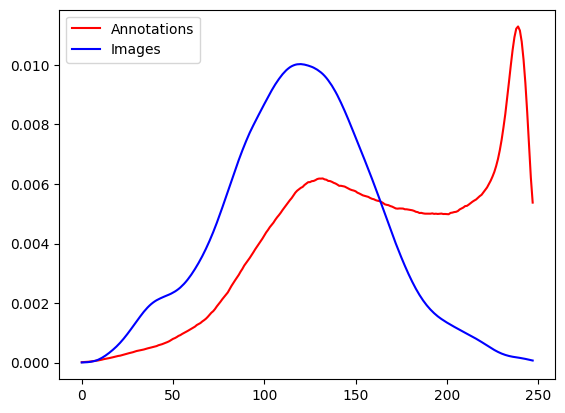

In [4]:
sum_of_annotations_hist_clustered = moving_average(sum_of_annotations_hist, n=9)
sum_of_image_hist_clustered = moving_average(sum_of_image_hist, n=9)



norm_sum_of_annotations_hist = sum_of_annotations_hist_clustered / np.sum(sum_of_annotations_hist_clustered)
norm_sum_of_image_hist = sum_of_image_hist_clustered / np.sum(sum_of_image_hist_clustered)

print(f"image count: {image_count}, annotation count: {annotation_count}")
print(f"median of annotations: {np.argmax(sum_of_annotations_hist)}, median of images: {np.argmax(sum_of_image_hist)}")
print(f"std of annotations: {np.std(norm_sum_of_annotations_hist)}, std of images: {np.std(norm_sum_of_image_hist)}")


    
plt.plot(norm_sum_of_annotations_hist, color="red")
plt.plot(norm_sum_of_image_hist, color="blue")
plt.legend(["Annotations", "Images"])
plt.show()

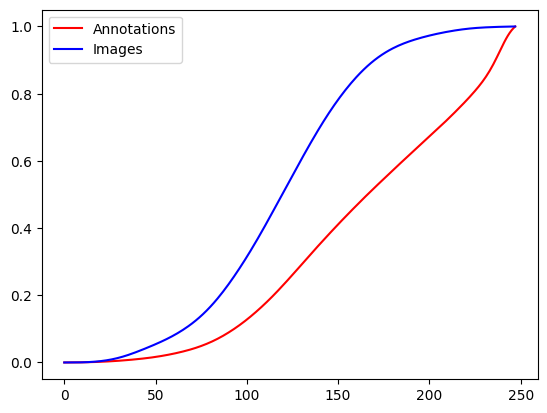

In [5]:
plt.plot(norm_sum_of_annotations_hist.cumsum(), color="red")
plt.plot(norm_sum_of_image_hist.cumsum(), color="blue")
plt.legend(["Annotations", "Images"])
plt.show()